# 지도학습 회귀 맛보기

## 목표
- 회귀 문제의 개념과 분류 문제와의 차이점 이해
- K-최근접 이웃 회귀와 선형 회귀의 작동 원리 파악
- 다항식 특성과 과대적합/과소적합 개념 학습
- 회귀 모델의 평가 지표 이해

In [2]:
import numpy as np          
import pandas as pd         
import matplotlib.pyplot as plt 

### 농어 무게 예측하기
- K-최근접이웃 회귀모델을 통해 길이값으로 무게 예측

##### 데이터 로드, 전처리, 시각화

In [3]:
# 데이터 준비
# - 입력: 길이
# - 라벨(정답): 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

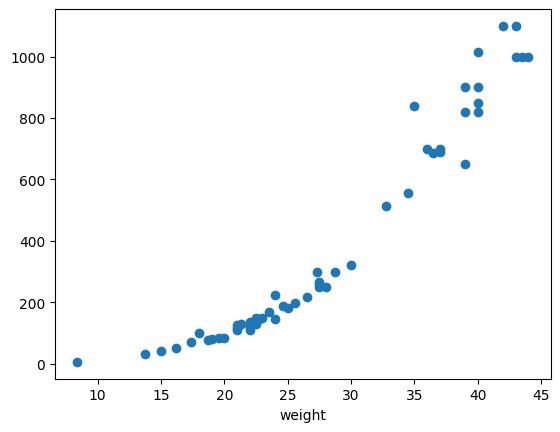

In [4]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

**train_test_split()**  
- 데이터를 학습용 데이터와 테스트(검증)용 데이터로 쉽게 나눠주는 함수

입력 데이터:  
- 예측에 사용할 특성(예: 길이, 무게 등)
정답 데이터:  
- 예측 대상 값(예: 무게)

test_size/train_size:  
- 테스트 또는 학습 데이터 비율 지정  
- 예) test_size=0.2 → 전체의 20%를 테스트 데이터로 사용

shuffle (기본값 True):  
- 데이터를 섞어서 분할할지 여부  
- False로 지정하면 데이터 순서대로 자름

stratify:  
- 특정 기준(라벨 등)의 비율을 유지하며 분할

random_state:  
- 분할 결과를 항상 동일하게(재현성 보장)  
- 고정된 숫자를 쓰면 매번 같은 결과

In [ ]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

# 훈련데이터와 테스트데이터 분리 -> 42 실행할때마다 같은 방식으로 분리되게
train_input, test_input, train_label, test_label = \
train_test_split(perch_length, perch_weight, random_state=42)

In [8]:
train_input, test_input

(array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
        22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
        36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
        22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5]),
 array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
        16.2, 28. , 27.3]))

In [9]:
train_label, test_label

(array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
         120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
         265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
         840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
          80.,  700.,  120.,  197., 1100.,  556.]),
 array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
         900. ,  125. , 1000. ,   51.5,  250. ,  300. ]))

---
- **scikit-learn**의 모델들은 입력 데이터를 **특별한(2차원) 형태**로 받아야 합니다.

| 현재 데이터 (1차원)      | 필요한 데이터 (2차원)          |
|:-------------------------|:------------------------------|
| `[8.4, 13.7, 15.0, ...]` | `[[8.4], [13.7], [15.0], ...]` |

#### reshape(-1, 1)란?
- **`-1`** : 샘플 개수만큼 자동으로 맞춰달라는 뜻<br>
- **`1`** : 각 데이터를 1개씩 ([길이])로 묶어달라는 뜻

> 즉, (샘플 수,)인 1차원 배열을 (샘플 수, 1)인 2차원 배열로 바꿔주는 명령입니다!

---

In [10]:
test_input[0]

np.float64(8.4)

In [11]:
# 샘플 갯수만큼 자동으로 각데이터를 1개씩 묶음
# 2차원 배열로 변경
train_input = train_input.reshape(-1,1) # 훈련데이터
test_input = test_input.reshape(-1,1) # 테스트데이터

In [12]:
test_input[0]

array([8.4])

##### 훈련 시키기

In [13]:
# K 최근접 이웃 회귀 모델을 학습시키 위한 모듈
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## `KNeighborsRegressor` 주요 파라미터 📋

| 파라미터 (Parameter) | 기본값 | 설명 |
| :--- | :--- | :--- |
| **`n_neighbors`** | `5` | 예측에 사용할 **이웃의 개수 (k)**를 의미합니다. K-NN 모델의 가장 중요한 파라미터입니다. |
| **`weights`** | `'uniform'` | 예측 시 이웃들의 값을 어떻게 **가중 평균**할지 결정합니다.<br> • `'uniform'`: 모든 이웃이 동일한 가중치를 가집니다. (단순 평균)<br> • `'distance'`: 거리가 가까운 이웃일수록 더 높은 가중치를 부여합니다. |
| **`algorithm`** | `'auto'` | 가장 가까운 이웃을 찾는 데 사용할 **내부 알고리즘**입니다.<br> • `'auto'`: 훈련 데이터에 맞춰 가장 적합한 알고리즘을 자동 선택합니다. |
| **`leaf_size`** | `30` | `algorithm`이 'BallTree' 또는 'KDTree'일 때 사용됩니다. 트리의 리프 노드(말단)에 저장될 **최소 샘플 수**를 지정합니다. |
| **`p`** | `2` | `metric`이 'minkowski'일 때 사용되는 **거리 계산 방식**을 정합니다.<br> • `p=1`: 맨해튼 거리 (Manhattan distance)<br> • `p=2`: 유클리드 거리 (Euclidean distance) |
| **`metric`** | `'minkowski'` | **거리 척도**(데이터 포인트 간의 거리를 계산하는 방법)를 지정합니다. <br>기본값인 'minkowski'와 `p=2`가 조합되어 **유클리드 거리**를 사용하게 됩니다. |
| **`metric_params`** | `None` | `metric` 함수에 전달할 추가적인 인자들입니다. (주로 사용자 정의 `metric` 사용 시) |
| **`n_jobs`** | `None` | 이웃 검색을 위해 병렬로 실행할 **CPU 코어 수**입니다.<br> • `None` (또는 `1`): 1개의 코어만 사용합니다.<br> • `-1`: 사용 가능한 모든 코어를 사용합니다. |

##### 평가 - 결정계수 $R^2$
$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$
- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [14]:
# 테스트 데이터를 넣었을때 얼마나 정확한지 확인
knr.score(test_input, test_label)

0.992809406101064

##### 예측

In [ ]:
knr.predict([[30]]) # 길이가 30일때 무게가 311.4 정도 될거다

array([311.4])

In [18]:
distance, index = knr.kneighbors([[30]])
distance, index

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [20]:
train_label[[13]]

array([260.])

In [21]:
train_label[index].mean() # 최근접 이웃 5개 무게 값의 평균치

np.float64(311.4)

##### 최근접이웃모델의 한계
- 메모리에 로드된 데이터포인트만 대상으로 예측하므로 한계점에서 취약
- 용량이 큰 데이터를 메모리에 로드하기때문에 문제발생가능

In [22]:
knr.predict([[50], [100]])

array([1010., 1010.])

### 선형회귀 모델

- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

**컬럼이 하나인 경우**

$y = wx + b$

1. 회귀계수 (= 기울기, 가중치, weight, coefficient)
2. 절편 (= 편향, bias, intercept)

In [ ]:
from sklearn.linear_model import LinearRegression #선형회귀

# 농어의 무게 예측 -> 길이
lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


가중치 w 확인

In [ ]:
# 회귀 계수 : 웨이트(w)
lr.coef_

array([39.01714496])

편향 b (bias) 확인

In [ ]:
# 데이터 패턴에 따라 편향이 음수로 나오기도함
lr.intercept_

np.float64(-709.0186449535474)

한번 직접 계산해 봅시다.

In [28]:
# y = wx + b

w = 39.01714496
b = -709.0186449535474
x = np.array([50, 100])

y = w*x + b

y

array([1241.83860305, 3192.69585105])

In [29]:
lr.predict([[50],[100]])

array([1241.83860323, 3192.69585141])

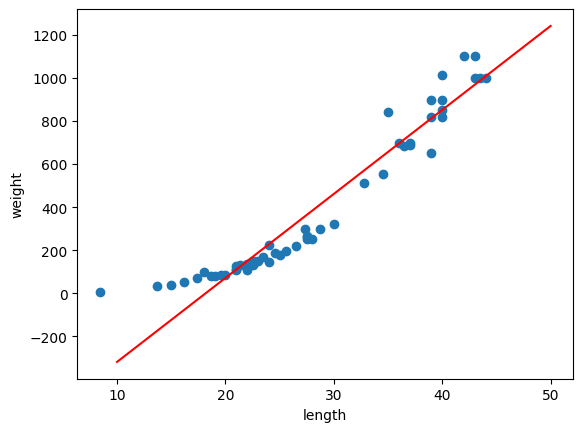

In [31]:
plt.scatter(perch_length, perch_weight)
plt.plot([10,50], [w*10 + b, w*50 + b], color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**score()**
- 테스트 데이터를 활용해 실제로 얼마나 정확한지 확인하는 방법

In [32]:
lr.score(test_input, test_label)

0.824750312331356

# 다중 선형 회귀
**컬럼이 여러 개인 경우**

$ y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b $

1. 회귀 계수 여러 개
2. 절편 한 개

### 특성 공학 (Feature Enginieering)
- 원본 데이터에서 **모델 학습에 도움이 되는 입력 변수(Feature)** 를 생성, 변환, 선택하는 과정입니다.
즉, 데이터를 모델이 잘 이해할 수 있도록 가공하는 기술입니다.

**주요 단계** 

| 단계                                  | 설명                               | 예시                            |
| ----------------------------------- | -------------------------------- | ----------------------------- |
| **1️⃣ 생성 (Feature Creation)**       | 기존 데이터를 조합하거나 도출하여 새로운 변수 생성     | 나이 = 현재년도 - 출생년도              |
| **2️⃣ 변환 (Feature Transformation)** | 스케일 조정, 로그 변환 등으로 모델 입력에 적합하게 만듦 | 정규화, 표준화, 로그변환, 원-핫인코딩        |
| **3️⃣ 선택 (Feature Selection)**      | 불필요하거나 중복된 변수를 제거하여 효율 향상        | 상관계수, 중요도 기반 선택, Lasso, PCA 등 |


**주요 기법**
| 구분          | 기법                      | 설명                 |
| ----------- | ----------------------- | ------------------ |
| **수치형 데이터** | 스케일링, 로그변환, 다항특성        | 이상치 완화, 비선형 관계 반영  |
| **범주형 데이터** | 원-핫 인코딩, 라벨 인코딩, 빈도 인코딩 | 텍스트형 데이터를 수치형으로 변환 |
| **시간형 데이터** | 연도, 월, 요일, 시각 등 파생변수 생성 | 시계열 특성 반영          |
| **텍스트 데이터** | TF-IDF, Word2Vec, 임베딩   | 단어의 의미를 벡터로 표현     |
| **이미지 데이터** | 픽셀 통계, CNN 특성 추출        | 시각적 패턴 반영          |


**PolynomialFeatures**
- 기존 특성을 거듭제곱하거나 조합해서 새로운 특성을 만들어준다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 1. 객체 생성 (degree는 다항식 차수)
# 기본적으로  절편값 1을 만들어준다
# 선형학습은 이미 내부적으로 bias를 같이 계산하기 때문에 중복되는 값이 들어 갈 수 있음.
poly = PolynomialFeatures(include_bias=False)

# 2. 원본 데이터 예시
import numpy as np
X = np.array([[2, 3]])

# 3. 변환
X_poly = poly.fit_transform(X)
print(X_poly)


##### 특성을 5차까지 늘려보기

### 과대적합 & 과소적합

**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘이기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기